# Dealing with Overdispersion - Introducing the Beta-Binomial Distribution

Previously, we explored the idea of varying the probability of dominant expression in a group of genes within the binomial distribution and found that it could lead to the over-dispersion problem. This means that the model does not reflect the data which is more dispersed (i.e. greater variance). Attempt to model this is demonstrated in the code below:

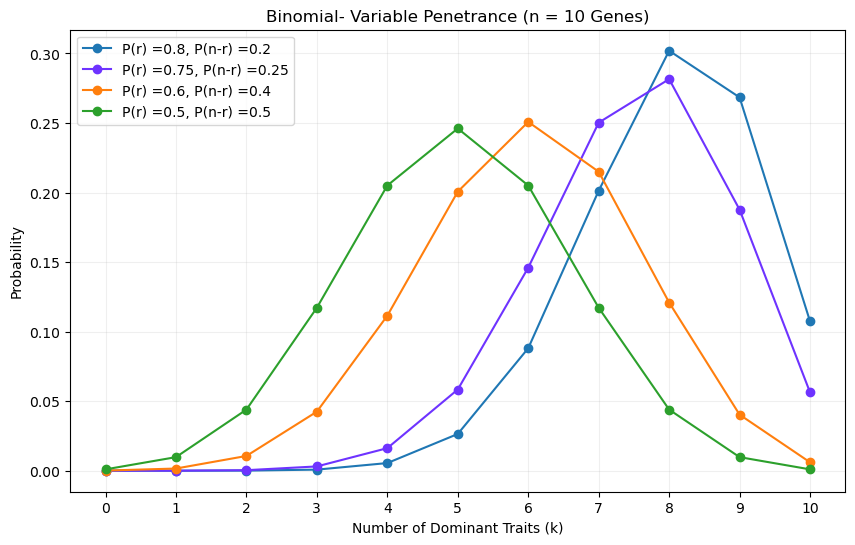

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom
from scipy.special import comb, betaln

# Set parameters
n_genes = 10

# Number of genes (trials)
alpha_priors = [n_genes*0.8, n_genes*0.75, n_genes*0.6, n_genes*0.5]  # Prior hyperparameters (α)
beta_priors = [n_genes*0.2, n_genes*0.25, n_genes*0.4, n_genes*0.5]   # Prior hyperparameters (β)

# Generate data
k_values = np.arange(0, n_genes + 1)

# Plot
plt.figure(figsize=(10, 6))
colors = ['#1f77b4','#6e33ff','#ff7f0e', '#2ca02c']

for i, (a, b) in enumerate(zip(alpha_priors, beta_priors)):
    # Compute Binomial PMF
    
    pmf =[ binom.pmf(k, n_genes, a/(a+b) ) for k in k_values]

    # Plot
    plt.plot(k_values, pmf, 'o-', color=colors[i], 
             label=f'P(r) ={a/n_genes}, P(n-r) ={b/n_genes}')
    
    # Overlay pure Binomial (for comparison)

plt.title(f'Binomial- Variable Penetrance (n = {n_genes} Genes)')
plt.xlabel('Number of Dominant Traits (k)')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.legend()
plt.grid(alpha=0.2)
plt.show()

Next, we explore the deviation from Mendelian probabilities via the beta-binomial distribution, in order to deal with overdispersion. When we look at the different probabilities of expression of dominant genes among a polygenic group (here n=10), we find that dispersion is closer to what is expected in high prevalence disorders. (Only extreme probabilities of dominant expression – 9/10 genes expressed dominantly – having a probability above 0.25).

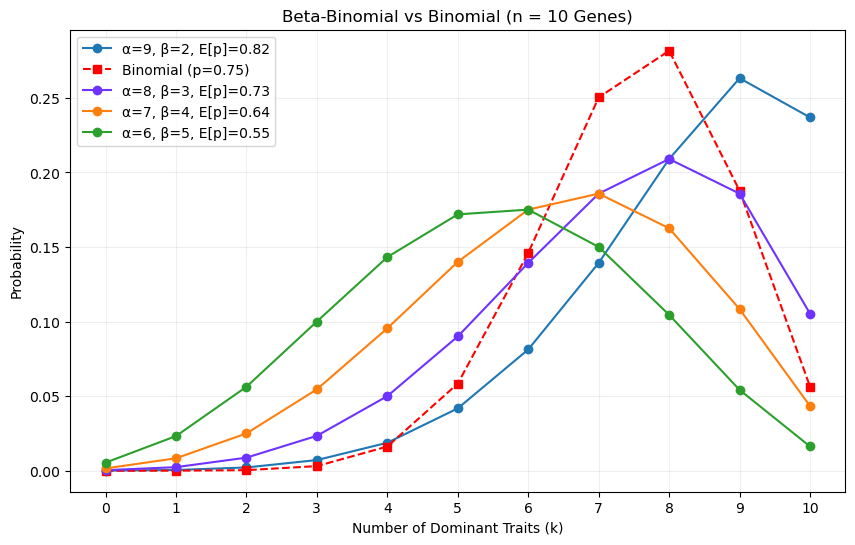

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom
from scipy.special import comb, betaln

def beta_binomial_pmf(k, n, alpha, beta_):
    # Beta-Binomial probability mass function (PMF)
    return comb(n, k) * np.exp(betaln(k + alpha, n - k + beta_) - betaln(alpha, beta_))

# Set parameters
n_genes = 10

# Number of genes (trials)
alpha_priors = [9, 8, 7, 6]  # Prior hyperparameters (α)
beta_priors = [2, 3, 4, 5]   # Prior hyperparameters (β)

# Generate data
k_values = np.arange(0, n_genes + 1)

# Plot
plt.figure(figsize=(10, 6))
colors = ['#1f77b4','#6e33ff','#ff7f0e', '#2ca02c']

for i, (a, b) in enumerate(zip(alpha_priors, beta_priors)):
    # Compute Beta-Binomial PMF
    pmf = [beta_binomial_pmf(k, n_genes, a, b) for k in k_values]
    
    # Plot
    plt.plot(k_values, pmf, 'o-', color=colors[i], 
             label=f'α={a}, β={b}, E[p]={a/(a + b):.2f}')
    
    # Overlay pure Binomial (for comparison)
    p_mendelian = 0.75
    pmf_binom = binom.pmf(k_values, n_genes, p_mendelian)
    if i == 0:
        plt.plot(k_values, pmf_binom, 's--', color='red', 
                 label=f'Binomial (p=0.75)')

plt.title(f'Beta-Binomial vs Binomial (n = {n_genes} Genes)')
plt.xlabel('Number of Dominant Traits (k)')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.legend()
plt.grid(alpha=0.2)
plt.show()


## Can the Beta-Binomial Dsitribution represent population prevelence via gene expression probabilities?  

The population prevalence P(D) = (PD|G) x P(G),
Where, P(G) is the gene configuration probability (e.g. if there are 8 “dominant” alleles and 2 “recessive” alleles, in combination, expressed with a particular probability (p(G)), then this phenotype may not be expressed in 100% of individuals who inherit it. Penetrance measures the proportion who will express the phenotype, thus the population prevalence.
The curves above indicate that the probability curves are more flattened compared to the pure Binomial model above.

This is an important insight that indicates that polygenic configurations will typically have probabilities of expression which may approach what is expected in high prevalence disorders. It is then necessary to apply this deductive model, to explore if this trend is generalisable.

It is necessary to next explore the full range of alpha and beta parameters for any set of genes N. Below an example is illustrated for N=10 genes. What was noted was that the plot of maximum probability for a family of gene combination N always converged to a minimum at k=N/2 where k is the number dominant (or recessive) genes being expressed. This is to be compared to previous example of 4 genes in which the dominant and recessive combinations were balanced. By now, dominant and recessive have no meaning. Therefore, in the case of the beta-binomial distribution, the balanced probability should be considered as an equal probability of expression of half the genes being of one set of variants and the other half of the gene combination being the opposite variant. In this situation, bi-allelic expression is assumed.

In [ ]:
import numpy as np
from scipy.stats import betabinom
import matplotlib.pyplot as plt

def plot_beta_binomial_priors(n_genes, alpha_beta_pairs):
    """
    Plots beta-binomial PMF for different (α, β) priors and gene counts
    
    Args:
        n_genes (int or list): Number of genes (trials)
        alpha_beta_pairs (list): List of (α, β) tuples
    """
    if isinstance(n_genes, int):
        n_genes = [n_genes]  # Convert to list for uniform processing
    
    fig, axes = plt.subplots(len(n_genes), 1, 
                            figsize=(10, 5 * len(n_genes)),
                            squeeze=False)
    
    for idx, n in enumerate(n_genes):
        ax = axes[idx, 0]
        k_values = np.arange(n + 1)
        
        for alpha, beta in alpha_beta_pairs:
            pmf = betabinom.pmf(k_values, n, alpha, beta)
            ax.plot(k_values, pmf, 'o-', markersize=4,
                    label=f'α={alpha}, β={beta} | E[p]={alpha/(alpha+beta):.2f}')
        
        ax.set_xlabel(f"Number of Dominantly Expressed Genes (k) | n={n}")
        ax.set_ylabel("Probability")
        ax.set_title(f"Beta-Binomial PMF for {n} Genes")
        ax.legend()
        ax.grid(True)
        ax.set_xticks(k_values[::max(1, n//10)])  # Auto-adjust ticks

    plt.tight_layout()
    plt.show()

# Example usage
n_gene_options = [10]  # Different gene counts to compare
priors = [
    (11, 1),    
    (10, 2),    
    (9, 3),    
    (8, 4),    
    (7, 5),   
    (6, 6), 
    (5, 7),    
    (4, 8),    
    (3,9),   
    (2, 10),
    (1,11)
]

plot_beta_binomial_priors(n_gene_options, priors)

Keeping this in mind, for the situation of polygenic inheritance with bi-allelic expression for all genes but with variable expression levels (i.e. the probability of each of two alleles may be variable, e.g. 0.8:0.2 or 0.5:0.5). In this model, the theory moves towards a convergence of balanced probability with equal overall probability of expression.

The beta-binomial probability curves define the probabilities of say, the “dominant” variant being expressed in a binomial distribution pattern, given a specific marginal probability varying between ~ 0.9 to 0.1. (Alternately the “recessive” variant probability of expression varies from ~0.1-0.9). The maximum probability of each such curve, for any number of genes N, can be plotted. 


## Developing a new construct - The Super-Probability curve

An interesting feature of the continuous variance of probability of allelic expression is that highest probability of expression for any combination of genes at a prior expresion probability ranging widely, is dipping below 0.2, which is about the upper range expected of population prevalence of common disorders. When we consider the constraint of penetrance, it indicates that polygenic inheritance using the beta-binomial distribution could model genetic contribution to common disorders (this is not to assert that there is complete genetic contribution to these disorders. It is accepted that there would be epigentic influences on gene expression and this will be considered as we build the model further). As a means of developing a deductive model further, we can plot the highest probability of expresion of gene combinations for the full family of curves for the group of 10 genes above. We will call this the **Super Probability** curve. Below we show this curve by highlighting the maximum probability points in red.

<img src="https://github.com/Polyneuro/Binomial-Genomics/images/Super.png" width=800, height=300/> ![](.images/Super.png)

Notice that the **Super Probability** curve appears similar to polynomial curve with a point at a minimum. Here, we would say that the minimum point of the maximum probability plot is at k = 5 or k = N/2. We can postulate that the lowest population prevalence for most probable gene combinations occur when there is a balanced probability of expression of agroup of n alles expressed in a bi-allelic pattern. If this lowest point of maximum probability of expresion is plotted for N  genes is generalised, we would be able to consider if a curve can be generated that approximates population prevalence for any number of genes. The code below generates such a plot.

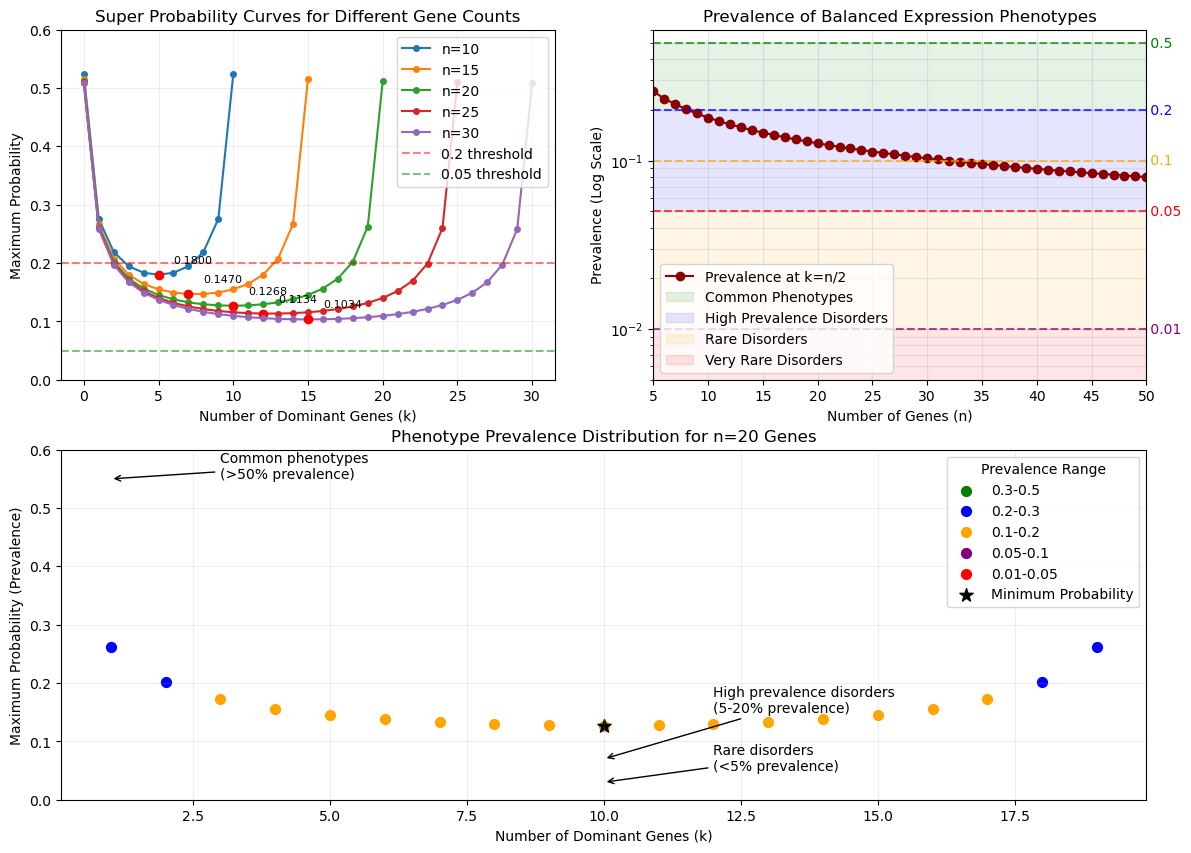


Analysis of Low-Prevalence Phenotypes (P < 0.2):
Gene Count (n)	% of k-values with P<0.2	Min Probability	k at Min
----------------------------------------------------------------------
10		100.0%			0.180043		5
15		100.0%			0.146968		7
20		100.0%			0.126834		10
25		100.0%			0.113425		12
30		100.0%			0.103395		15


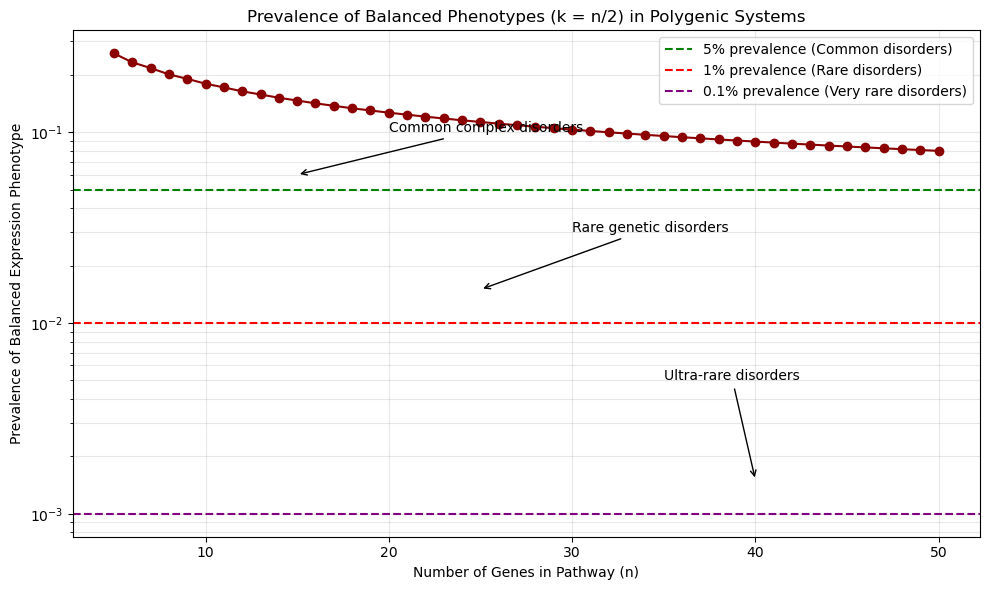


Prevalence of Balanced Expression Phenotypes (k = n/2):
Gene Count (n)	Prevalence	Clinical Interpretation
------------------------------------------------------------
10		0.1800		Common complex disorder
15		0.1470		Common complex disorder
20		0.1268		Common complex disorder
25		0.1134		Common complex disorder
30		0.1034		Common complex disorder
40		0.0895		Rare genetic disorder
50		0.0800		Rare genetic disorder


In [1]:
import numpy as np
from scipy.stats import betabinom
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def create_super_probability_curve(n):
    """Creates the super probability curve for a fixed number of genes (n)"""
    k_values = np.arange(n + 1)
    max_probabilities = np.zeros(n + 1)
    
    # For each possible k_target (which determines alpha and beta)
    for k_target in range(n + 1):
        alpha = k_target + 1
        beta = n - k_target + 1
        probs = betabinom.pmf(k_values, n, alpha, beta)
        
        # Track the maximum probability at each k
        max_probabilities = np.maximum(max_probabilities, probs)
    
    # Find the minimum of the super curve (at k = n/2)
    min_idx = np.argmin(max_probabilities)
    min_k = min_idx
    min_prob = max_probabilities[min_idx]
    
    return k_values, max_probabilities, min_k, min_prob

# Set up the analysis
gene_counts = np.arange(5, 51)  # Gene counts from 5 to 50
prevalence_thresholds = [0.5, 0.3, 0.2, 0.1, 0.05, 0.01]
prevalence_colors = ['green', 'blue', 'orange', 'purple', 'red', 'maroon']

# Create the main figure with GridSpec layout
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, figure=fig)

# 1. Super probability curves for key gene counts
ax1 = fig.add_subplot(gs[0, 0])
selected_n = [10, 15, 20, 25, 30]
for n in selected_n:
    k_vals, max_probs, min_k, min_prob = create_super_probability_curve(n)
    ax1.plot(k_vals, max_probs, '-o', label=f'n={n}', markersize=4)
    
    # Highlight the minimum point
    ax1.plot(min_k, min_prob, 'ro', markersize=6)
    
    # Annotate the minimum probability
    ax1.annotate(f'{min_prob:.4f}', (min_k, min_prob), 
                 xytext=(min_k+1, min_prob+0.02), fontsize=8)

ax1.set_title('Super Probability Curves for Different Gene Counts')
ax1.set_xlabel('Number of Dominant Genes (k)')
ax1.set_ylabel('Maximum Probability')
ax1.axhline(y=0.2, color='r', linestyle='--', alpha=0.5, label='0.2 threshold')
ax1.axhline(y=0.05, color='g', linestyle='--', alpha=0.5, label='0.05 threshold')
ax1.legend()
ax1.grid(alpha=0.2)
ax1.set_ylim(0, 0.6)

# 2. Clear prevalence landscape for the minimum probability at k=n/2
ax2 = fig.add_subplot(gs[0, 1])

# Calculate minimum probabilities for each gene count
min_probs = []
for n in gene_counts:
    _, _, _, min_prob = create_super_probability_curve(n)
    min_probs.append(min_prob)

# Plot the minimum probability curve
ax2.plot(gene_counts, min_probs, 'o-', color='darkred', label='Prevalence at k=n/2')

# Add prevalence zones
ax2.fill_between(gene_counts, 0.2, 0.5, color='green', alpha=0.1, label='Common Phenotypes')
ax2.fill_between(gene_counts, 0.05, 0.2, color='blue', alpha=0.1, label='High Prevalence Disorders')
ax2.fill_between(gene_counts, 0.01, 0.05, color='orange', alpha=0.1, label='Rare Disorders')
ax2.fill_between(gene_counts, 0, 0.01, color='red', alpha=0.1, label='Very Rare Disorders')

# Add threshold lines
thresholds = [0.5, 0.2, 0.1, 0.05, 0.01]
colors = ['green', 'blue', 'orange', 'red', 'purple']
for threshold, color in zip(thresholds, colors):
    ax2.axhline(y=threshold, color=color, linestyle='--', alpha=0.7)
    ax2.text(50, threshold, f' {threshold}', color=color, va='center')

ax2.set_yscale('log')
ax2.set_xlabel('Number of Genes (n)')
ax2.set_ylabel('Prevalence (Log Scale)')
ax2.set_title('Prevalence of Balanced Expression Phenotypes')
ax2.legend()
ax2.grid(True, which="both", ls="-", alpha=0.3)
ax2.set_ylim(0.005, 0.6)
ax2.set_xlim(5, 50)

# 3. Prevalence distribution for n=20
ax3 = fig.add_subplot(gs[1, :])  # This spans the entire bottom row

n_analysis = 20
k_vals, max_probs, min_k, min_prob = create_super_probability_curve(n_analysis)

# Classify phenotypes by prevalence
prevalence_zones = []
for i in range(len(prevalence_thresholds)-1):
    lower = prevalence_thresholds[i+1]
    upper = prevalence_thresholds[i]
    mask = (max_probs > lower) & (max_probs <= upper)
    prevalence_zones.append((k_vals[mask], max_probs[mask], f'{lower}-{upper}'))

# Plot prevalence zones
colors = ['green', 'blue', 'orange', 'purple', 'red']
for (k_zone, p_zone, label), color in zip(prevalence_zones, colors):
    ax3.scatter(k_zone, p_zone, color=color, label=label, s=50)

# Add the minimum point
ax3.scatter([min_k], [min_prob], color='black', s=100, marker='*', label='Minimum Probability')

# Add biological interpretation annotations
ax3.annotate('Common phenotypes\n(>50% prevalence)', 
             (1, 0.55), xytext=(3, 0.55), 
             arrowprops=dict(arrowstyle="->", color='black'))
ax3.annotate('High prevalence disorders\n(5-20% prevalence)', 
             (10, 0.07), xytext=(12, 0.15), 
             arrowprops=dict(arrowstyle="->", color='black'))
ax3.annotate('Rare disorders\n(<5% prevalence)', 
             (10, 0.03), xytext=(12, 0.05), 
             arrowprops=dict(arrowstyle="->", color='black'))

ax3.set_title(f'Phenotype Prevalence Distribution for n={n_analysis} Genes')
ax3.set_xlabel('Number of Dominant Genes (k)')
ax3.set_ylabel('Maximum Probability (Prevalence)')
ax3.legend(title='Prevalence Range')
ax3.grid(alpha=0.2)
ax3.set_ylim(0, 0.6)

# Save the figure without tight_layout
plt.savefig('./images/phenotype_prevalence_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Quantitative analysis of low-prevalence region
print("\nAnalysis of Low-Prevalence Phenotypes (P < 0.2):")
print("Gene Count (n)\t% of k-values with P<0.2\tMin Probability\tk at Min")
print("-"*70)

for n in selected_n:
    k_vals, max_probs, min_k, min_prob = create_super_probability_curve(n)
    
    # Exclude extreme phenotypes (k=0,1,2 and k=n,n-1,n-2)
    mask = (k_vals > 2) & (k_vals < n-2)
    middle_k = k_vals[mask]
    middle_probs = max_probs[mask]
    
    # Calculate percentage of phenotypes with prevalence < 0.2
    low_prevalence = np.sum(middle_probs < 0.2)
    percent_low = low_prevalence / len(middle_probs) * 100
    
    # FIXED THE FORMATTING ERROR HERE
    print(f"{n}\t\t{percent_low:.1f}%\t\t\t{min_prob:.6f}\t\t{min_k}")

# 5. Minimum probability trend - FOCUS ON LOW PREVALENCE
min_probs = [create_super_probability_curve(n)[3] for n in gene_counts]

plt.figure(figsize=(10, 6))
plt.semilogy(gene_counts, min_probs, 'o-', color='darkred')
plt.axhline(y=0.05, color='g', linestyle='--', label='5% prevalence (Common disorders)')
plt.axhline(y=0.01, color='r', linestyle='--', label='1% prevalence (Rare disorders)')
plt.axhline(y=0.001, color='purple', linestyle='--', label='0.1% prevalence (Very rare disorders)')

# Add biological interpretation annotations
plt.annotate('Common complex disorders', 
             (15, 0.06), xytext=(20, 0.1), 
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate('Rare genetic disorders', 
             (25, 0.015), xytext=(30, 0.03), 
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate('Ultra-rare disorders', 
             (40, 0.0015), xytext=(35, 0.005), 
             arrowprops=dict(arrowstyle="->", color='black'))

plt.xlabel('Number of Genes in Pathway (n)')
plt.ylabel('Prevalence of Balanced Expression Phenotype')
plt.title('Prevalence of Balanced Phenotypes (k = n/2) in Polygenic Systems')
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('./images/min_prevalence_trend.png', dpi=300)
plt.show()

# 6. Focus on low-prevalence region
print("\nPrevalence of Balanced Expression Phenotypes (k = n/2):")
print("Gene Count (n)\tPrevalence\tClinical Interpretation")
print("-"*60)
for n in [10, 15, 20, 25, 30, 40, 50]:
    min_prob = create_super_probability_curve(n)[3]
    if min_prob > 0.1:
        interpretation = "Common complex disorder"
    elif min_prob > 0.01:
        interpretation = "Rare genetic disorder"
    else:
        interpretation = "Ultra-rare disorder"
    print(f"{n}\t\t{min_prob:.4f}\t\t{interpretation}")


## Interpretation of the plot of the Super Probability Minima

When these super probability curves for maximum probability of gene configurations are considered, the minimum of such maximum probability occurs at k=n/2 (balanced probability of both variants) at a marginal probability each of 0.5. The marginal probability is the total probability of each allele as summed in each row illustrated in the previous chapter. This is not biologically plausible (alleles are generally not equally expresed) but sets the lower limit to maximum probability of any gene configuration and their expression for a set of genes N. It is assumed that gene expression configurations would follow highest probabilities, given a prior expectation. these prior expectations would be influenced by other levels of a binomial tree, thus independence cannot be assumed. 

Next, we can examine the nature of the plots of these minima. The minima for total number of genes of any polygenic combination (a super-probability curve for any number N of genes) were plotted for gene numbers from 2 to 50. It was discovered that the highest probability of any gene combination will not go below about 0.05 (or close to 5% population prevalence. It was also noted that most gene combinations had a probability of phenotypic expression of less than 0.3. This model appeared to account for high prevalence disorders but not prevalences lower than this. 

The next step is to consider gene-gene interactions that could alter the prevalence levels further. In preparation for this it is necessary to consider deviation from bi-allelic expresion of genes. AI was prompted to develop a Dirichlet multinomial model to draw similar curves as the beta-binomial plot of minima of super probability curves at k=N/2. For the purpose of keeping to culturally neutral approach we will call this the alpha-multinomial distribution (alpha being the concentration parameter for this distribution as beta is the normalizing factor for the beta-binomial). The Dirichlet Multinomial distribution is covered in the next three chapters/ Jupyter notebooks.